# Тестовое задание (риски)

Основная гипотеза: \
<b>Отношение первоначального взноса к стоимости недвижимости (ПВ) хорошо ранжирует платёжеспособность клиентов (уровень просрочки).</b>


Необходимые шаги для построения проверки гипотезы:
<ul>
    <li>Проверить поставленную гипотезу и составить аналитическую записку.</li>
    <li>Составить предложение по использованию первоначального взноса (ПВ) с Системе Принятия Решений (СПР).</li>
    <li>Оценить эффект на уровне одобрения от внедрения инициативы.</li>
    <li>Составить бизнес-требование для разработчиков, на основании которого будет реализовано предложение.</li>
    <li>Описать тестовые кейсы, на основании которых будет проведена проверка корректности технической реализации.</li>
</ul>

Для того, чтобы установить все необходимые библиотеки необходимо сначал выполнить следующую команду.

In [1]:
pip install -r requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.


## 1. Проверка гипотезы

Для начала необходимо добавить все необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.simplefilter('ignore')

In [3]:
dt = pd.read_csv('dataset.csv', sep=';')

Теперь нужно ознакомиться с полученными данными.

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   application_id    7307 non-null   int64  
 1   pd                7307 non-null   float64
 2   initinal_payment  7307 non-null   float64
 3   delay             7307 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 228.5 KB


In [5]:
dt.head()

,application_id,pd,initinal_payment,delay
0,1,0.054,0.290,0
1,2,0.138,0.183,0
2,3,0.135,0.244,0
3,4,0.042,0.271,0
4,5,0.058,0.174,0


In [6]:
dt.describe()

,application_id,pd,initinal_payment,delay
count,7307.000000,7307.000000,7307.000000,7307.000000
mean,3654.000000,0.053607,0.279208,0.024223
std,2109.493541,0.032504,0.077206,0.153752
min,1.000000,0.000000,0.006000,0.000000
25%,1827.500000,0.031000,0.225000,0.000000
50%,3654.000000,0.045000,0.282000,0.000000
75%,5480.500000,0.065000,0.339000,0.000000
max,7307.000000,0.249000,0.494000,1.000000


Видно, что отношение первоначального взноса к стоимости недвижимости максимально достигает почти 0,5. В среднем ПВ достигает около 0,28 от полной стоимости.

Для того, чтобы провести дальнейший анализ посмотрим сначала на корреляцию между переменными.

In [8]:
corr_mat = dt.corr()

In [9]:
corr_mat

,application_id,pd,initinal_payment,delay
application_id,1.000000,-0.012965,0.016846,-0.027189
pd,-0.012965,1.000000,-0.294857,0.098643
initinal_payment,0.016846,-0.294857,1.000000,-0.102574
delay,-0.027189,0.098643,-0.102574,1.000000


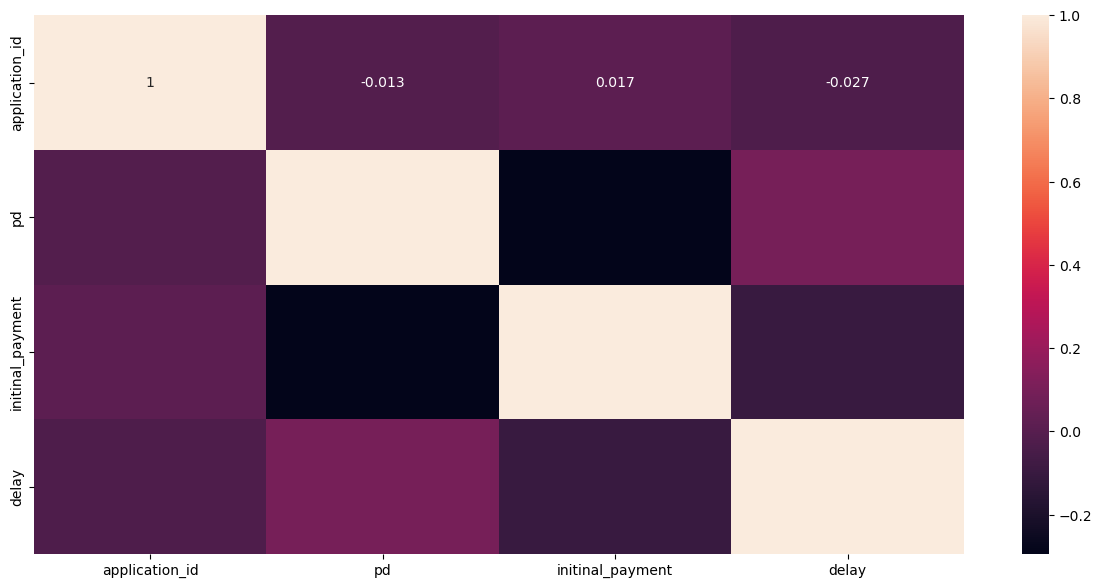

In [10]:
plt.figure(figsize= (15, 7))
sns.heatmap(corr_mat, annot=True)
plt.show()

По графику видно, что наибольшая корреляция (в данном случае обратная -0,3) достигается между вероятностью просрочки и первоначальным взносом. Это говорит о том, что с ростом ПВ снижается риск просрочки кредита.

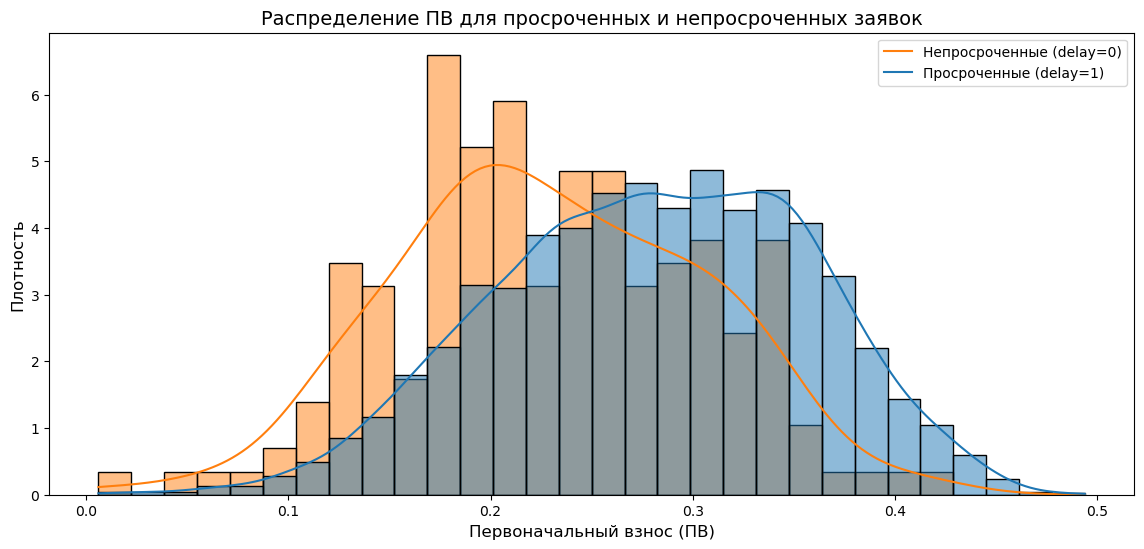

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(data=dt, x='initinal_payment', hue='delay', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Распределение ПВ для просроченных и непросроченных заявок', fontsize=14)
plt.xlabel('Первоначальный взнос (ПВ)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend(['Непросроченные (delay=0)', 'Просроченные (delay=1)'])
plt.show()

По графику видно, что:
<ul>
    <li>У непросроченных заявок (delay=0) распределение ПВ сдвинуто вправо (в среднем выше).</li>
    <li>У просроченных заявок (delay=1) значение ПВ чаще встречается на низких уровнях.</li>
</ul>


Теперь разобьем данные на признаки и целевую метрику и после поделим всю выборку на тренировочную и тестовую.

In [15]:
x = dt[['initinal_payment']]
y = dt['delay']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Напримре, в данном случае, рассмотрим для анализа две модели - линейную регрессию и случайный лес. Сначала рассмотрим этим модели без параметров.

In [33]:
model_l = LogisticRegression()
model_l.fit(x_train, y_train)

LogisticRegression()

In [25]:
model_f = RandomForestClassifier(random_state= 12345)
model_f.fit(x_train, y_train)

RandomForestClassifier(random_state=12345)

In [34]:
y_pred_l = model_l.predict(x_test)
y_pred_proba_l = model_l.predict_proba(x_test)[:, 1]

In [27]:
y_pred_f = model_f.predict(x_test)
y_pred_proba_f = model_f.predict_proba(x_test)[:, 1]

In [35]:
roc_auc = roc_auc_score(y_test, y_pred_proba_l)
classification_rep = classification_report(y_test, y_pred_l)
roc_auc, classification_rep

(0.6930308699719363,
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      2138\n           1       0.00      0.00      0.00        55\n\n    accuracy                           0.97      2193\n   macro avg       0.49      0.50      0.49      2193\nweighted avg       0.95      0.97      0.96      2193\n')

In [29]:
roc_auc = roc_auc_score(y_test, y_pred_proba_f)
classification_rep = classification_report(y_test, y_pred_f)
roc_auc, classification_rep


(0.5569053490943107,
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      2138\n           1       0.00      0.00      0.00        55\n\n    accuracy                           0.97      2193\n   macro avg       0.49      0.50      0.49      2193\nweighted avg       0.95      0.97      0.96      2193\n')

Таким образом, модель случайного леса показала результаты хуже, чем модель логистической регрессии, поэтому будем использовать ее.

Построим графики ROC-кривой и график, который показывает trade-off между точностью (precision) и полнотой (recall) .

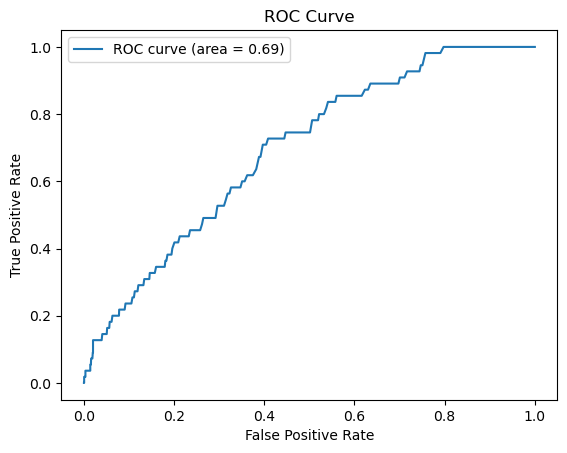

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_l)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Площадь под кривой (AUC) составляет 0.71, что говорит о приемлемом качестве модели. Значение около 0.7 указывает на то, что модель способна различать дефолтные и недефолтные заявки лучше, чем случайное угадывание.

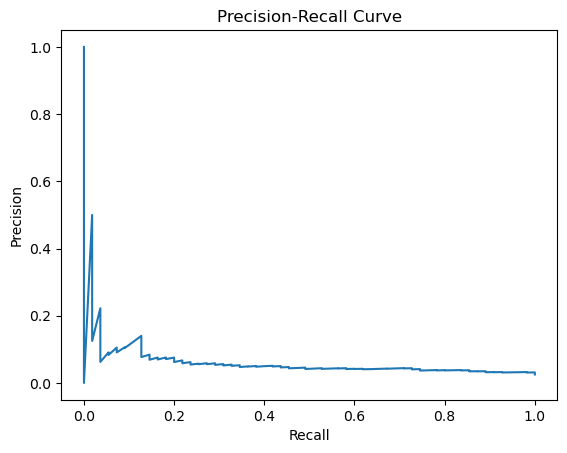

In [37]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_l)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Наблюдается высокий Precision при низких значениях Recall, что может быть полезно для сценариев, где важно минимизировать количество дефолтных заявок. Однако при увеличении Recall Precision значительно падает.